# 01 - Statistical Inference and Dummy Regression

by [Ivan Torroledo](ivantorroledo.com/)

version 0.2, Feb 2017

## Part of the class [Machine Learning for Risk Management](https://github.com/albahnsen/ML_RiskManagement)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US).

## How we do Statiscal Inference in Machine Learning?

It's usually acepted that Machine Learning algorithms have a huge power to predict and describe unknown data based in observed data. However from statistical framework, ML is not generally concern about statistical significance of predictions or estimated parameters as it's usually true for traditional quantitative areas like econometrics, psicometrics and so on. 

But first, let's remenber some concepts:

### Statistical Significance

In statistical hypothesis testing, lets define the hypothesis test as:

    $Ho$: no relation between pair of measurments, independent events 
    $Ha$: there is no evidence to neglected there is no realtion between variables. 
, the level of significance  $\alpha$  is define as the probability is the probability of the study rejecting the null hypothesis, given that it were true.

] More precisely, the significance level defined for a study and the p-value of a result, p, is the probability of obtaining a result at least as extreme, given that the null hypothesis were true. The result is statistically significant, by the standards of the study, when p < α


In statistics, a result or estimation is significant when it is very unlikely to have occurred aleatority.


The significance level for a study is chosen before data collection, and typically set to 5%[12] or much lower, depending on the field of study.[13] In any experiment or observation that involves drawing a sample from a population, there is always the possibility that an observed effect would have occurred due to sampling error alone.[14][15] But if the p-value of an observed effect is less than the significance level, an investigator may conclude that the effect reflects the characteristics of the whole population,[1] thereby rejecting the null hypothesis.[16] This technique for testing the significance of results was developed in the early 20th century.



In this notebook we are going to go in deeper in the importance of inferencial statistics and how this analysis could affect Machine Learning results.




Let's start with an example of credit scoring. 

In [1]:
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
data.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In this data set, we have demographic data (Gender, Married, Etnicithy, ...) and account information of several clients of a particular bank. 
Usually all this data it's commonly used to create scoring models, but we are to take one step backward this time. 
We want to know if some variables are important to predict the income of a client. So, Lets analysze gender variable. 

The relevant question is:

Is Gender **statistically** relevant to describe Income of a client? or in other words, there is a **statistical** diference between male and female incomes?

In [2]:
data.groupby('Gender').mean()

,Income,Limit,Rating,Cards,Age,Education,Balance
Gender,,,,,,,
Male,45.610316,4713.165803,353.518135,2.989637,55.595855,13.466321,509.803109
Female,44.853928,4756.516908,356.265700,2.927536,55.734300,13.434783,529.536232


In [3]:
# data.Gender
X = data.Gender.map({' Male': 1, 'Female':0})
Y = data.Balance
male_balance= data[data.Gender==' Male'].Balance
female_balance = data[data.Gender=='Female'].Balance

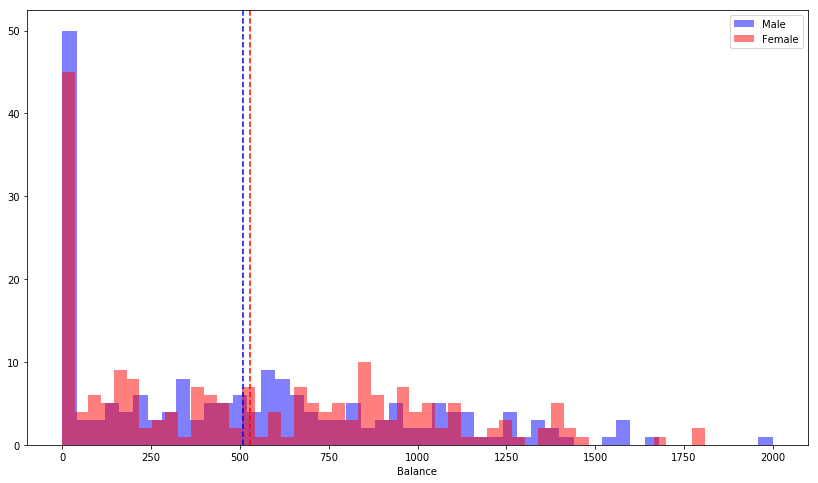

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(male_balance, bins =50, facecolor='blue', alpha=0.5,label='Male')
n, bins, patches = plt.hist(female_balance, bins =50,facecolor='red', alpha=0.5,label='Female')
plt.axvline(male_balance.mean(),linestyle='--',color='blue',)
plt.axvline(female_balance.mean(),linestyle='--',color='red',)
plt.xlabel('Balance')
plt.legend()

Visually, tt's seems that there is not difference in Balance account through Gender.


Before start to check lets see if the data is balanced throuhg Gender. 

In [8]:
data.Gender.value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

The data set can be assumed as balanced through Gender.



## How we check if this diference is statistically significant?

Several methods can be applied to solve this question. Let's see two:

1. **To se Linear regression model to estimate the effect of gender in balance account. If the estimated parameter is equal to zero, there is no effect of income in Balance?

2. To estimate if this mean difference in Balance account it is due to aleatorrity or not. we can use shuffling technique to sample the the Balance account distribution.


In [154]:
def lr_h(beta,x):
    return np.dot(beta, x.T)

In [150]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression(fit_intercept=False)

In [151]:
linReg.fit(X.reshape(-1, 1) ,Y)

/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [152]:
linReg.intercept_

0.0

In [153]:
linReg.coef_

array([509.80310881])

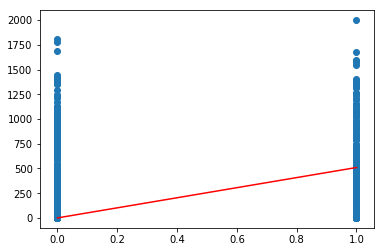

In [158]:
plt.scatter(X,Y)
plt.plot(X,X*linReg.coef_,c='r')

Then clearly the estimated slope of the linear regression says that there is a non zero effect of Gender over Balance. WRONG!!

To check the mean value of the estimated we need to look for the significance. But how we can do? We can calculate the distribution and use a t statistics to get significance. However this is complicated and we can do easily by simulating the distribution.

---
Shuffling Algorithm:

Shuffling algorithm is a sampling technique commonly used to simulate empirical distributions from the data.

the idea is to simulate the distribution by shiflling the labels repeatedly and computing a desired statistic. 
Behinf this algorithm is that if the labls really don't matter, then switching them sould not chage the result. 

Steps:

1. Shuffle labels in the data. 
2. Rearrange 
3. Compunte the mean by label.
    

First calculate the mean difference of Balance in the data. 

In [162]:
original_difference = female_income.mean() - male_income.mean()
print('The difference in balance by gender is: ', original_difference)

The difference in balance by gender is:  19.73312307576782


In [217]:
dataframe = pd.DataFrame(X)
dataframe['Balance'] = Y

In [218]:
dataframe.head()

,Gender,Balance
1,1,333
2,0,903
3,1,580
4,0,964
5,1,331


In [242]:
def shuf_data(frame):
    vec = np.zeros(frame.Gender.count()).astype(float)
    vec[np.random.choice(frame.Gender.count(),sum(frame.Gender),replace=False)] = 1
    frame['Gender'] = vec 
    return frame

In [244]:
dataframe.groupby('Gender').mean()

DataError: No numeric types to aggregate

In [221]:
dataframe.head()

,Gender,Balance
1,1,333
2,0,903
3,1,580
4,0,964
5,1,331


In [212]:
def compute_means(frame):
    return

,Gender,Balance,new_Gender,Gender Gender
1,1,333,1,0
2,0,903,0,1
3,1,580,1,0
4,1,964,0,0
5,1,331,0,1
6,0,1151,0,0
7,0,203,1,0
8,1,872,1,1
9,0,279,1,0
10,0,1350,0,0


In [159]:
# First find the value of statistics for the original data
# Then, normalizing data 

gender_ori = data['Gender'] == "Female"
data_f = data[gender_ori].head()
data_m = data[~gender_ori].head()

X_m=data_m[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y_m=data_m['Balance']

X_f=data_f[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y_f=data_f['Balance']

scaler1 = preprocessing.StandardScaler().fit(X_m)
X_m = scaler1.transform(X_m)
Y_m = (Y_m - np.mean(Y_m))/np.std(Y_m)

scaler1 = preprocessing.StandardScaler().fit(X_f)
X_f = scaler1.transform(X_f)
Y_f = (Y_f - np.mean(Y_f))/np.std(Y_f)


In [15]:
# Evalueate statistics for the original data, we set alpha = 0.5 from previous analysis
# https://github.com/Torroledo/advancedComputationalMethods/blob/master/clases/semana11/Liner_Model_Regularization_LASSO.ipynb
# female  
clf_f = linear_model.Lasso(alpha=0.5)
clf_f.fit(X_f, Y_f)
# male
clf_m = linear_model.Lasso(alpha=0.5)
clf_m.fit(X_m, Y_m)

# First statistic, (difference between estimated betas)
diff_beta_ori = sum((clf_f.coef_-clf_m.coef_)**2)
    
# Second statistic (difference between scores)
diff_score_ori = (clf_f.score(X_f, Y_f)-clf_m.score(X_m, Y_m))
print (diff_beta_ori)
print (diff_score_ori)

0.0309044822458
-0.00140854911502


In [16]:
simul = 10000
n,m = X.shape 
diff_beta  = np.zeros(simul)
diff_score = np.zeros(simul)
for i in range(simul):
    # Assign aleatorily the gender
    gender = np.random.randint(0,2,n)
    
    #Normalization between groups
    selection = gender==1
    scaler1 = preprocessing.StandardScaler().fit(X[selection])
    X_f_normal = scaler1.transform(X[selection])
    Y_f_normal = (Y[selection] - np.mean(Y[selection]))/np.std(Y[selection])
        
    selection = gender==0
    scaler = preprocessing.StandardScaler().fit(X[selection])
    X_m_normal = scaler.transform(X[selection])
    Y_m_normal = (Y[selection] - np.mean(Y[selection]))/np.std(Y[selection])
    
    # female  
    clf_f = linear_model.Lasso(alpha=0.5)
    clf_f.fit(X_f_normal, Y_f_normal)
    # male
    clf_m = linear_model.Lasso(alpha=0.5)
    clf_m.fit(X_m_normal, Y_m_normal)
    
    # first statistic (sum of squared differences between betas)
    diff_beta[i] = sum((clf_f.coef_-clf_m.coef_)**2)
    
    # Second statistic (score)
    diff_score[i] = (clf_f.score(X_f_normal,Y_f_normal)-clf_m.score(X_m_normal, Y_m_normal))
    

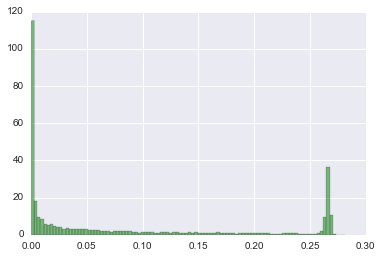

In [19]:
n, bins, patches = plt.hist(diff_beta, bins =100, normed=1.0, facecolor='green', alpha=0.5)

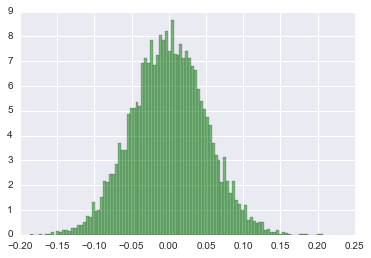

In [20]:
n, bins, patches = plt.hist(diff_score, bins =100, normed=1.0, facecolor='green', alpha=0.5)
values, base = np.histogram(diff_score, bins = 100)

---

We can see that score it is a better statistics than difference in betas because betas has a bimodal distribution. So, usinng the estimated distribution of score statistic

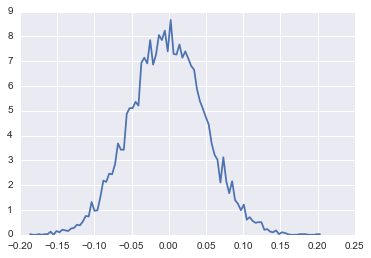

In [21]:
area = sum(values*(base[1:]-base[:-1]))
values_new = values/area

plt.plot(base[:-1],values_new)

In [24]:
print('if total area is : ' + str(area) + '  for a 0.05 of significance is ' + str(area*0.05))

if total area is : 39.3486094056  for a 0.05 of significance is 1.96743047028


In [31]:
# calculating area of statistic for orignal data 

area = sum(values[base<diff_score_ori]*(base[1:][base<diff_score_ori] -base[:-1][base<diff_score_ori]))

print(area)

19.2886883306


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 101
  app.launch_new_instance()


# Conclusion 

So the area related with the score statistic for the original data is greater than area related with a p-value(0.05), then we can say that with 0.05 significance there is not difference between models that divide by gender